# Assignment - Liner Regression

*** No CODEPAGE record, no encoding_override: will use 'ascii'


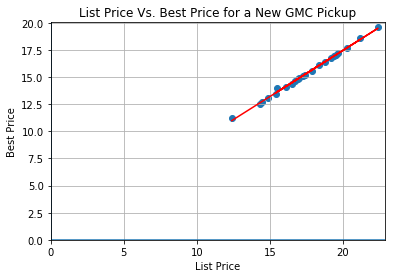

Slope :  0.8511440378638504 
Coefficient :  0.4345844908253138
RSE :  0.10868338378542268 
R_sq :  0.9970831247402355
test 27.67119370246853


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# read File
dframe = pd.read_excel("https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr01.xls")

X_data = dframe['X'].values
Y_data = dframe['Y'].values

# Calculate Mean 
X_mean = X_data.mean()
Y_mean = Y_data.mean()

Num,Den = 0,0

# Calculation for slope & coeffiecient
for i in range(len(X_data)):
    Num+=(X_data[i]-X_mean) * (Y_data[i]-Y_mean)
    Den+= (X_data[i]-X_mean)**2
    
slope = Num/Den
coeffiecient =Y_mean-slope*X_mean

y_pred=[]
for i in range(len(X_data)):
    y_pred.append(coeffiecient+(slope*X_data[i]))
    
# Grpah Plot
plt.scatter(X_data,Y_data)
plt.plot(X_data,y_pred,'r')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('List Price')
plt.ylabel('Best Price')
plt.title('List Price Vs. Best Price for a New GMC Pickup')
plt.axhline()
plt.axvline()
plt.grid()
plt.show()

# Calculation for RMSE & R2
RSS,TSS=0,0
for k in range(len(X_data)):
    RSS+=(Y_data[k]-y_pred[k])**2
    TSS+=(Y_data[k]-Y_mean)**2

RSE=math.sqrt(RSS/len(X_data))
R_sq= 1-(RSS/TSS)

print('Slope : ',slope,'\nCoefficient : ',coeffiecient)
print('RSE : ',RSE,'\nR_sq : ',R_sq)

#print('RSS : ',RSS,'\nTSS : ',TSS)
#print('X_Mean : ',X_mean,'\nY_Mean : ',Y_mean)
print('test',coeffiecient+(slope*32))
# predict_for(input())

*** No CODEPAGE record, no encoding_override: will use 'ascii'


/home/swatitiwari/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/swatitiwari/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


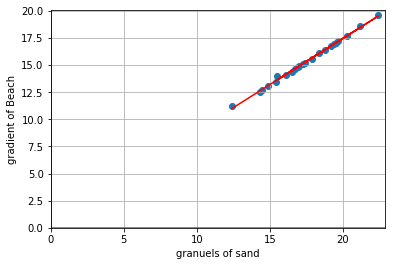

Mean Square Error:  0.10868338378542285
Accuracy:  0.9970831247402355


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Cannot use Rank 1 matrix in scikit learn

dframe = pd.read_excel("https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr01.xls")

X = dframe['X'].values
Y = dframe['Y'].values
m = len(X)

X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y) # scores are btw 0 and 1 , larger score indicating  a better fit

# Grpah Plot
plt.scatter(X,Y)
plt.plot(X_data,y_pred,'r')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('List Price')
plt.ylabel('Best Price')
plt.title('List Price Vs. Best Price for a New GMC Pickup')
plt.axhline()
plt.axvline()
plt.grid()
plt.show()

print('Mean Square Error: ', np.sqrt(mse))
print('Accuracy: ', r2_score)
